# Small Image Classification Using Convolutional Neural Network (CNN)

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

In [1]:
from IPython.display import Image

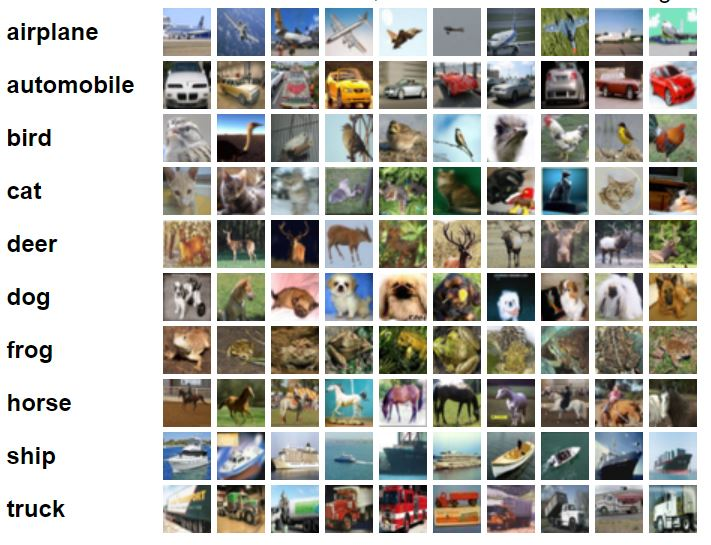

In [2]:
Image('small_images.jpg')

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## Load the dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape


(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:

y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


Let's plot some images to see what they are

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

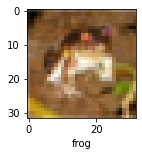

In [10]:
plot_sample(X_train, y_train, 0)

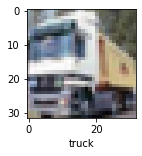

In [11]:
plot_sample(X_train, y_train, 1)


Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

## Normalizing the training data

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Build simple artificial neural network for image classification

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.8125 - accuracy: 0.3557
Epoch 2/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.6274 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 96s 62ms/step - loss: 1.5448 - accuracy: 0.4559
Epoch 4/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.4852 - accuracy: 0.4774
Epoch 5/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.4363 - accuracy: 0.4952


### Difference between sparse_categorical_crossentropy and categorical_crossentropy

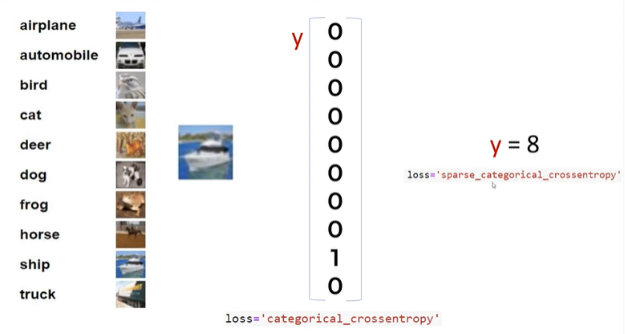

In [3]:
Image('Capture.png')

#### You can see that at the end of 5 epochs, accuracy is at around 49%

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.58      0.51      1000
           1       0.58      0.65      0.61      1000
           2       0.36      0.36      0.36      1000
           3       0.36      0.40      0.38      1000
           4       0.41      0.43      0.42      1000
           5       0.41      0.38      0.39      1000
           6       0.55      0.49      0.52      1000
           7       0.72      0.38      0.50      1000
           8       0.47      0.71      0.57      1000
           9       0.63      0.35      0.45      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.47     10000
weighted avg       0.49      0.47      0.47     10000




## Now let us build a convolutional neural network to train our images

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.5054 - accuracy: 0.4605
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1513 - accuracy: 0.5947
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0190 - accuracy: 0.6466
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9424 - accuracy: 0.6740
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8821 - accuracy: 0.6957
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8294 - accuracy: 0.7130
Epoch 7/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.7878 - accuracy: 0.7274
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7464 - accuracy: 0.7399
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7109 - accuracy: 0.7518
Epoch 10/10
1563/1563 [==============================] - 59s 38m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9136 - accuracy: 0.6971


[0.9135986566543579, 0.6970999836921692]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[4.79847752e-03, 9.19794984e-05, 3.45555978e-04, 9.11395192e-01,
        6.03563327e-04, 2.80955993e-02, 9.15173907e-04, 4.69980965e-04,
        5.32444976e-02, 3.99800483e-05],
       [1.26731163e-02, 1.21910349e-01, 1.19761726e-05, 3.89564093e-07,
        1.67928574e-05, 7.36343475e-09, 1.92117167e-08, 1.02737289e-07,
        8.65218639e-01, 1.68548941e-04],
       [4.29993048e-02, 3.77783537e-01, 1.97618851e-03, 1.35899279e-02,
        1.86192186e-03, 7.36359740e-04, 5.48437354e-04, 1.67697598e-03,
        5.40608585e-01, 1.82187669e-02],
       [7.95743465e-01, 4.24204674e-03, 4.00980981e-03, 2.23716744e-03,
        1.33219445e-02, 2.08200236e-05, 4.95718486e-05, 5.28431672e-04,
        1.78458765e-01, 1.38801755e-03],
       [6.95872368e-05, 2.87712406e-04, 8.31865519e-03, 2.86901593e-02,
        5.96454561e-01, 1.11675623e-03, 3.64698201e-01, 2.43847317e-05,
        3.36884637e-04, 3.15889292e-06]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

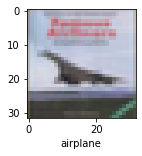

In [22]:
plot_sample(X_test, y_test,3)

In [23]:
classes[y_classes[3]]

'airplane'

In [24]:
classes[y_classes[3]]

'airplane'

### What is the output of Sigmoid
Lets say you have 2 classes sigmoid function will return the probability of these two classes
1. 0.66
2. 0.23



## What is the output of softmax

In [4]:
(0.45) /(0.45+0.55)

0.45

Softmax function normalizes the output 